<a href="https://colab.research.google.com/github/YeojinKim03/With-GANADA/blob/main/20220818_audio_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.9.1
Uninstalling tensorflow-2.9.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.9.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.9.1


In [2]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 1.4 MB 7.3 MB/s 
     |████████████████████████████████| 5.8 MB 46.1 MB/s 
     |████████████████████████████████| 462 kB 76.7 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [3]:
# restart 후 확인
import tensorflow as tf
print(tf.__version__)

2.8.0


In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩

In [17]:
import IPython
import librosa
SAMPLING_RATE = 22050

In [9]:
import glob

file_list = glob.glob("/gdrive/MyDrive/tmp/audio/A/*.wav")
print(len(file_list))
print(file_list[:3]) # 파일 이름 6_nicolas_21.wav : 6을 니콜라스가 읽은 21번째 파일

358
['/gdrive/MyDrive/tmp/audio/A/01_015.wav', '/gdrive/MyDrive/tmp/audio/A/01_320.wav', '/gdrive/MyDrive/tmp/audio/A/01_146.wav']


In [12]:
def load_wav(file_name):
    data, _ = librosa.load(file_name, sr=SAMPLING_RATE)
    return data

raw_x = []
raw_y = []
for file_name in file_list:
    label = int(file_name.split("/")[-1].split("_")[0])  # 파일명을 /로 구분하여 스필릿, 다시 _로 스플릿
    # label 은 파일명의 첫 숫자만
    print(file_name, label)
    data = load_wav(file_name)
    raw_x.append(data)
    raw_y.append(label)


/gdrive/MyDrive/tmp/audio/A/01_015.wav 1
/gdrive/MyDrive/tmp/audio/A/01_320.wav 1
/gdrive/MyDrive/tmp/audio/A/01_146.wav 1
/gdrive/MyDrive/tmp/audio/A/01_151.wav 1
/gdrive/MyDrive/tmp/audio/A/01_148.wav 1
/gdrive/MyDrive/tmp/audio/A/01_016.wav 1
/gdrive/MyDrive/tmp/audio/A/01_131.wav 1
/gdrive/MyDrive/tmp/audio/A/01_325.wav 1
/gdrive/MyDrive/tmp/audio/A/01_138.wav 1
/gdrive/MyDrive/tmp/audio/A/01_014.wav 1
/gdrive/MyDrive/tmp/audio/A/01_013.wav 1
/gdrive/MyDrive/tmp/audio/A/01_010.wav 1
/gdrive/MyDrive/tmp/audio/A/01_326.wav 1
/gdrive/MyDrive/tmp/audio/A/01_157.wav 1
/gdrive/MyDrive/tmp/audio/A/01_009.wav 1
/gdrive/MyDrive/tmp/audio/A/01_323.wav 1
/gdrive/MyDrive/tmp/audio/A/01_149.wav 1
/gdrive/MyDrive/tmp/audio/A/01_017.wav 1
/gdrive/MyDrive/tmp/audio/A/01_322.wav 1
/gdrive/MyDrive/tmp/audio/A/01_139.wav 1
/gdrive/MyDrive/tmp/audio/A/01_147.wav 1
/gdrive/MyDrive/tmp/audio/A/01_145.wav 1
/gdrive/MyDrive/tmp/audio/A/01_319.wav 1
/gdrive/MyDrive/tmp/audio/A/01_144.wav 1
/gdrive/MyDrive/

In [15]:
print(raw_y[350])

1


In [18]:
print(raw_y[0])
IPython.display.Audio(raw_x[0], rate=SAMPLING_RATE)

1


In [19]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

1


In [20]:
print(raw_y[2])
IPython.display.Audio(raw_x[2], rate=SAMPLING_RATE)

1


# padding

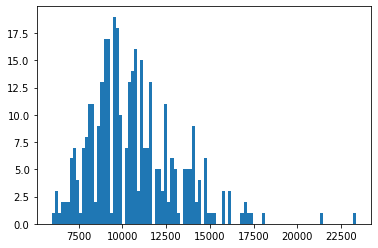

In [21]:
lens = []
for i in range(len(raw_x)):
    lens.append(len(raw_x[i]))

plt.hist(lens, bins=100)
plt.show()

In [22]:
print(lens[:10])

[9226, 13892, 7177, 10805, 14062, 9602, 8379, 13671, 8073, 9482]


In [23]:
from tensorflow.keras.preprocessing import sequence

padded_raw_x = sequence.pad_sequences(raw_x, maxlen=22000, padding='post', dtype=float)
# 파일 길이를 똑같이 맞춤 22000 (1초로)

In [24]:
print(raw_y[0])
IPython.display.Audio(raw_x[0], rate=SAMPLING_RATE)

1


In [25]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

1


In [26]:
print(raw_y[2])
IPython.display.Audio(raw_x[2], rate=SAMPLING_RATE)

1


In [27]:
raw_x = np.array(padded_raw_x)
raw_y = np.array(raw_y)
print(raw_x.shape)  # 3000개, 22000(길이 1초)
print(raw_y.shape)

(358, 22000)
(358,)


In [28]:
print(raw_y[0])
IPython.display.Audio(raw_x[0], rate=SAMPLING_RATE)

1


In [29]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

1


In [30]:
print(raw_y[2])
IPython.display.Audio(raw_x[2], rate=SAMPLING_RATE)

1


# Normalization

In [31]:
max = np.max(raw_x)
min = np.min(raw_x)
print(min, max)

-0.9870938062667847 1.0517815351486206


In [ ]:
# raw_x = (raw_x - min) / (max - min)

# 2차원으로 reshape

In [32]:
raw_x = raw_x.reshape((len(raw_x),-1,1))
print(raw_x.shape)

(358, 22000, 1)


In [33]:
a = np.arange(12)
b = a.reshape((6, -1))
print(b.shape)

(6, 2)


# 데이터 분리

In [34]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.2, shuffle=True)

In [35]:
print(train_y[0])
IPython.display.Audio(train_x[0].squeeze(), rate=SAMPLING_RATE)

1


In [36]:
print(train_y[1])
IPython.display.Audio(train_x[1].squeeze(), rate=SAMPLING_RATE)

1


In [39]:
print(train_y[2])
IPython.display.Audio(train_x[2].squeeze(), rate=SAMPLING_RATE)

1


In [40]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

# loss graph를 학습하면서 실시간으로 그리는 방법

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

In [50]:
# overfitting 추가
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input, Activation
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Conv1D, MaxPooling1D, AveragePooling1D, Add, MaxPool1D
from tensorflow.keras.layers import Dropout, GaussianNoise, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(GaussianNoise(0.01))

# 모델 줄이기
model.add(Conv1D(64, 31, padding="same", activation="relu"))  

model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Conv1D(64, 31, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Conv1D(64, 31, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Conv1D(64, 31, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Conv1D(64, 31, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Conv1D(64, 31, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Conv1D(64, 31, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Conv1D(64, 31, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Conv1D(64, 31, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))  # 출력 : 카테고리 10개 중 하나로 분류

from tensorflow.keras.optimizers import Adam, Adadelta
optimizer = Adam(learning_rate=0.001*0.1, decay=0.01)  

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["acc"])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_5 (GaussianN  (None, 22000, 1)         0         
 oise)                                                           
                                                                 
 conv1d_45 (Conv1D)          (None, 22000, 64)         2048      
                                                                 
 batch_normalization_51 (Bat  (None, 22000, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling1d_45 (MaxPoolin  (None, 11000, 64)        0         
 g1D)                                                            
                                                                 
 conv1d_46 (Conv1D)          (None, 11000, 64)         127040    
                                                      

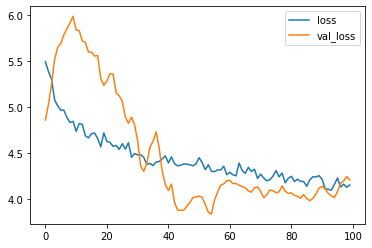

loss =  4.157051086425781 , val_loss =  4.213911056518555
17/17 [==============================] - 2s 122ms/step - loss: 4.1571 - acc: 0.3307 - val_loss: 4.2139 - val_acc: 0.3448


In [43]:
plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=1000, verbose=1, validation_split=0.1, batch_size=16,
                    callbacks=[plot_losses])

3/3 [==============================] - 2s 222ms/step - loss: 4.4710 - acc: 0.2222
loss= 4.471039295196533
acc= 0.2222222238779068


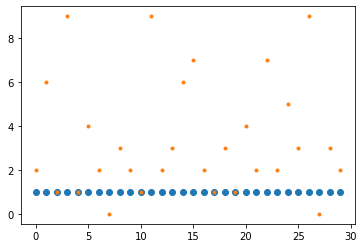

In [44]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()

# 0번 카테고리 (파란점과 주황점 같으면 예측, 틀리면 예측 못한 것)